## Business problem

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\sarbadas\Documents\\Python Scripts\\penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# EDA

In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [6]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [7]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [8]:
df= df[df['sex']!='.']
df.shape

(343, 7)

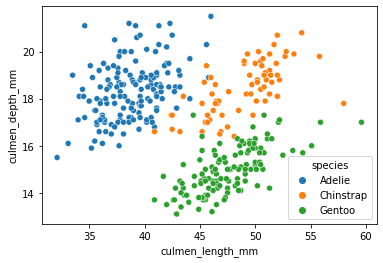

In [9]:
sns.scatterplot(hue ='species',x='culmen_length_mm',y= 'culmen_depth_mm',data=df)
plt.show()

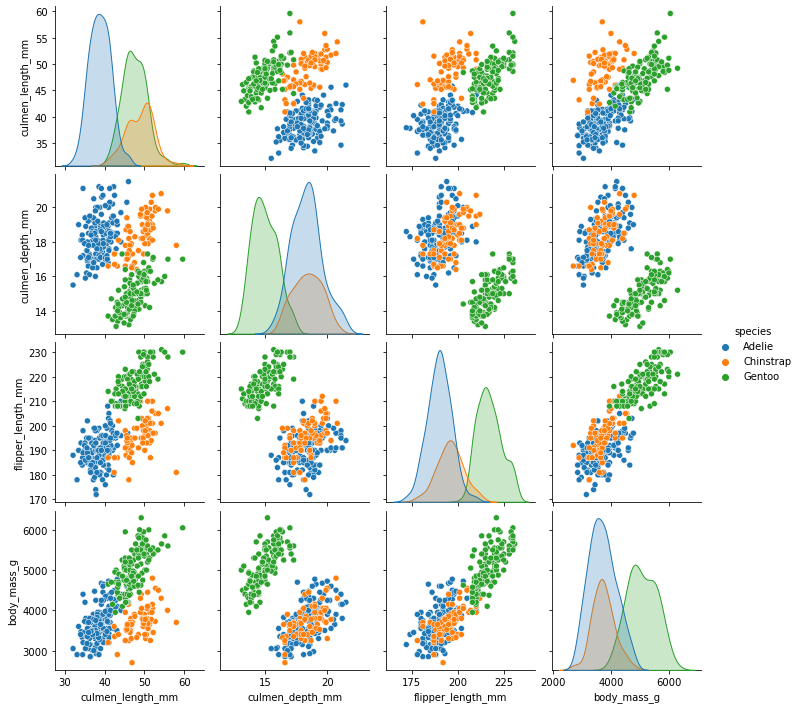

In [10]:
sns.pairplot(df,hue ='species')

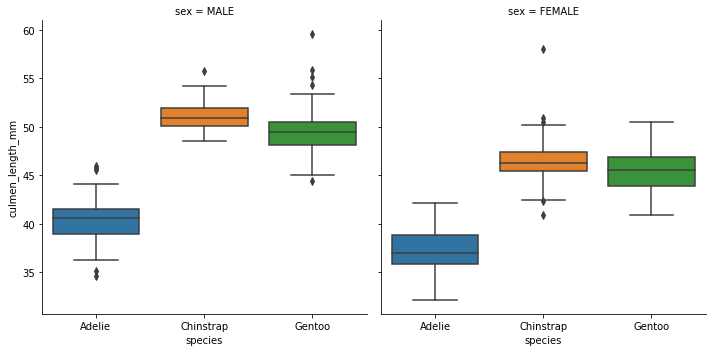

In [11]:
sns.catplot(x ='species',y='culmen_length_mm',data=df,kind= 'box', col='sex')
plt.show()

## Feature Engineering

## Missing Values

In [12]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [13]:
df= df.dropna()
df.shape

(333, 7)

## Encoding

In [14]:
pd.get_dummies(df.drop('species',axis= 1),drop_first =True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [15]:
x= pd.get_dummies(df.drop('species',axis= 1),drop_first =True)
y = df['species']

In [16]:
x

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [17]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

# Train_test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.3, random_state=101)

# Modelling

**DecisionTree with default parameter**

In [19]:
## import
from sklearn.tree import DecisionTreeClassifier

#save the model
model = DecisionTreeClassifier()

#fit
model.fit(X_train,Y_train)

DecisionTreeClassifier()

## Predictions

In [20]:
#predictions on your train data
pred_train = model.predict(X_train)

#predictions on your test data
base_pred = model.predict(X_test)

## Evaluation

In [21]:
from sklearn.metrics import accuracy_score
print("Train accuracy:",accuracy_score(Y_train,pred_train)) 
print("Test accuracy:",accuracy_score(Y_test,base_pred)) 

Train accuracy: 1.0
Test accuracy: 0.96


C:\Users\sarbadas\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


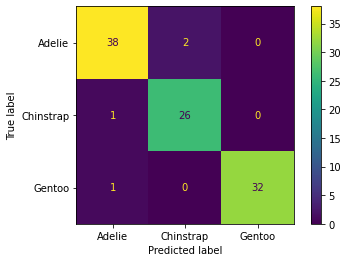

In [22]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model,X_test,Y_test)

plt.show()

In [23]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.93      0.96      0.95        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x,y,cv=5)
print ("Cross Validation score:",scores.mean())

Cross Validation score: 0.9729081863410223


#### Importance of each features given by this model

In [25]:
model.feature_importances_

array([0.33350103, 0.02010577, 0.60147473, 0.        , 0.04491847,
       0.        , 0.        ])

In [27]:
pd.DataFrame(index=x.columns,data= model.feature_importances_,columns = ['feature_importances'])

,feature_importances
culmen_length_mm,0.333501
culmen_depth_mm,0.020106
flipper_length_mm,0.601475
body_mass_g,0.000000
island_Dream,0.044918
island_Torgersen,0.000000
sex_MALE,0.000000


## Visualize the Tree

In [28]:
from sklearn.tree import plot_tree

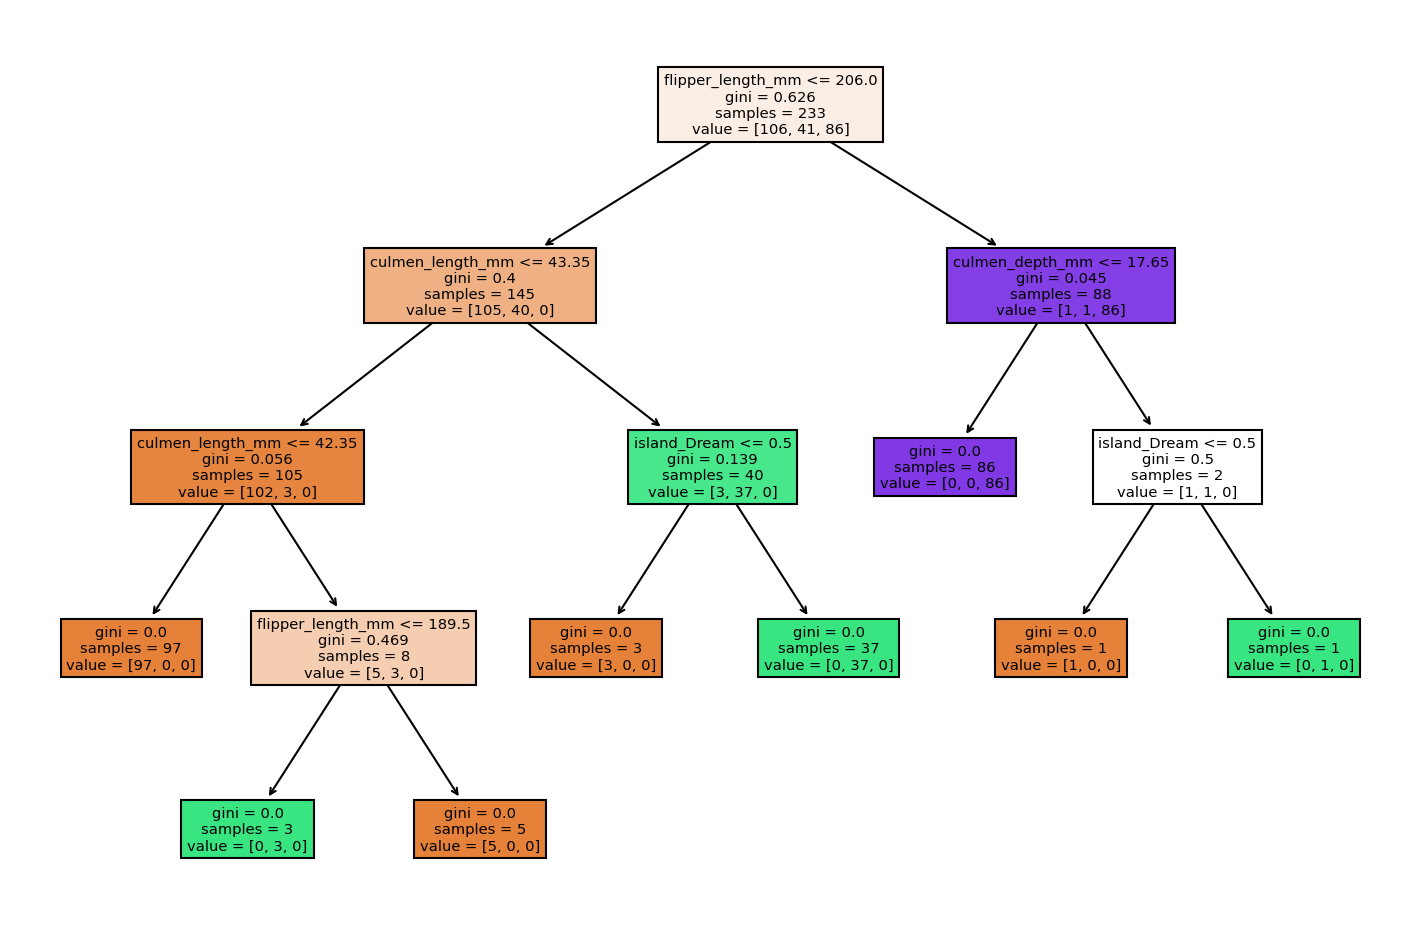

In [31]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled= True, feature_names= x.columns)
plt.show()

## Optimization -- Pruning of Decion Tree

**Max Depth**

In [32]:
pruned_tree = DecisionTreeClassifier(max_depth =2)

In [33]:
def report_model(model):
    model.fit(X_train,Y_train)
    model_preds = model.predict(X_test)
    pred_train = model.predict(X_train)
    print("Train accuracy:",accuracy_score(Y_train,pred_train)) 
    print("Test accuracy:",accuracy_score(Y_test,model_preds)) 
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled= True, feature_names= x.columns)

Train accuracy: 0.9699570815450643
Test accuracy: 0.92


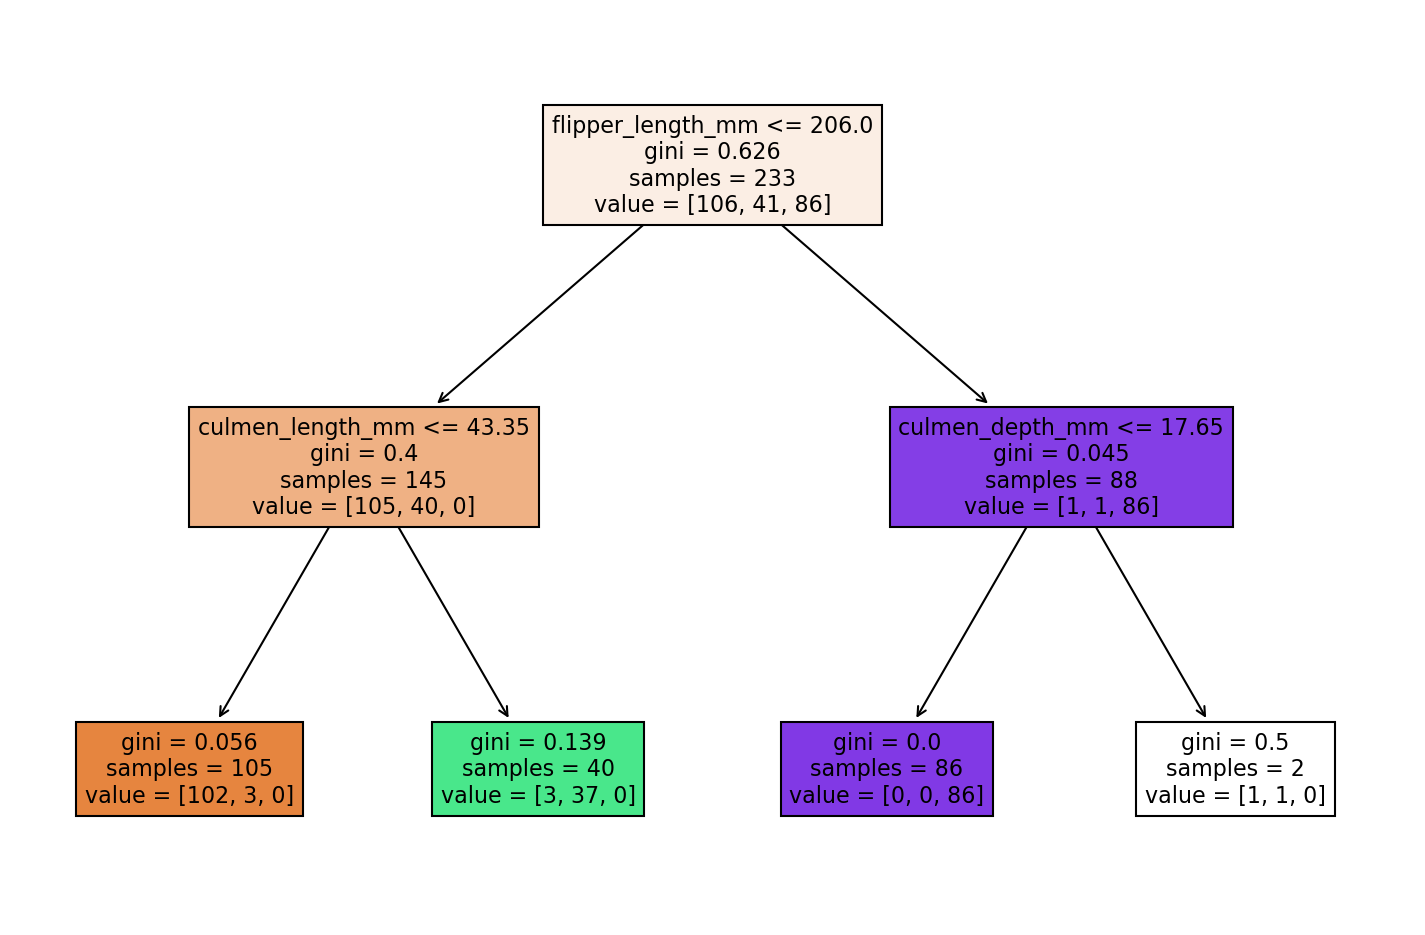

In [34]:
report_model(pruned_tree)

## Max Leaf Nodes

In [40]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes =3)

Train accuracy: 0.9699570815450643
Test accuracy: 0.92


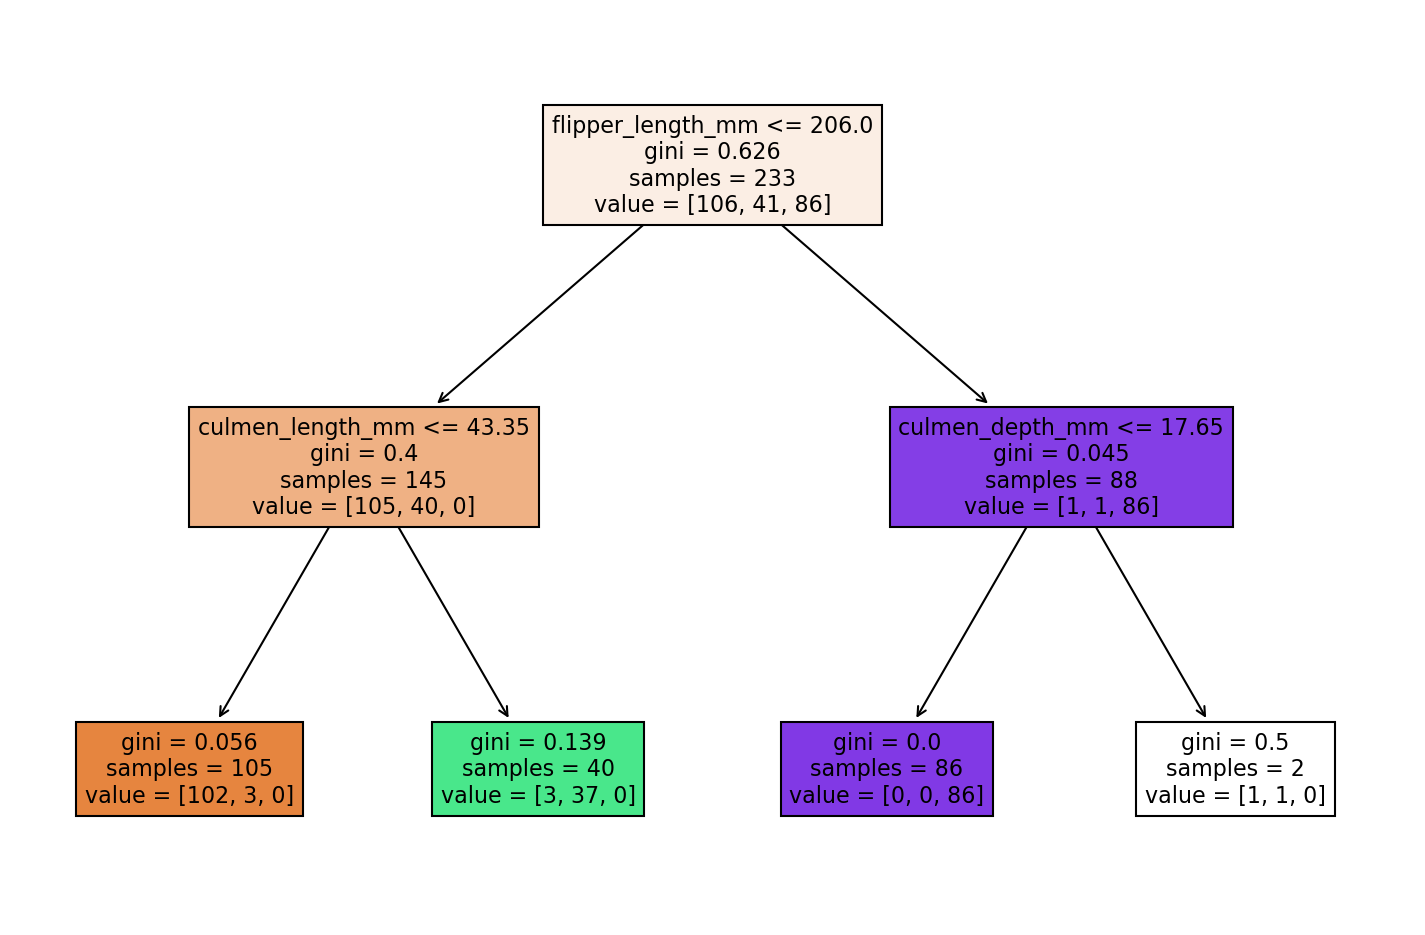

In [37]:
report_model(pruned_tree)